### Set up imports

In [1]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

### Load data

In [2]:
# df = pd.read_excel('vaccinare-covid19-grupe-risc-01-22.03.2021.xlsx')
df = pd.read_excel("https://data.gov.ro/dataset/b86a78a3-7f88-4b53-a94f-015082592466/resource/bc19c354-644d-4a24-a26f-512129dbc70d/download/vaccinare-covid19-grupe-risc-01-24.03.2021.xlsx")

In [3]:
df

,Județ,Localitate,Nume centru,Data vaccinării,Produs,Doze administrate,Doza 1,Doza 2,Grupa de risc
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alba,Aiud,SALĂ DE SPORT AIUD,2021-03-01,Pfizer - BIONTech,1.0,1.0,0.0,Categoria I / personalul din medicina primară ...
2,Alba,Cugir,Foaierul CENTRULUI CULTURAL Cugir,2021-03-01,Pfizer - BIONTech,46.0,46.0,0.0,Categoria a II-a / adulți cu vârsta peste 65 d...
3,Alba,Alba Iulia,SALĂ DE SPORT-Universitatea 1 Decembrie,2021-03-01,Pfizer - BIONTech,34.0,34.0,0.0,Categoria a II-a / persoanele aflate în eviden...
4,Alba,Sebes,CENTRUL DE ZI pentru persoane vârstnice Sebes,2021-03-01,Pfizer - BIONTech,2.0,2.0,0.0,Categoria a II-b / personalul din sectorul eco...
...,...,...,...,...,...,...,...,...,...
122219,Vrancea,Adjud,SPITAL MUNICIPAL ADJUD,2021-03-23,Pfizer - BIONTech,3.0,1.0,2.0,Categoria a II-b / personalul din sectorul eco...
122220,Vrancea,Focsani,Centru_S_centru_1_Sala Sport Suraia,2021-03-23,Pfizer - BIONTech,32.0,1.0,31.0,Categoria a II-a / adulți cu vârsta peste 65 d...
122221,Vrancea,Panciu,Centrul de cronici Panciu,2021-03-23,Astra-Zeneca,1.0,1.0,0.0,Categoria a II-a / persoanele aflate în eviden...
122222,Vrancea,Suraia,Centru 3_Sala de sport Suraia,2021-03-23,Moderna,13.0,13.0,0.0,Categoria a II-a / adulți cu vârsta peste 65 d...


### Clean up

In [4]:
df_clean = df.dropna(how='all')

### Convert values to correct type

In [5]:
df_clean['Data vaccinării'] = pd.to_datetime(df['Data vaccinării'])
df_clean['Doze administrate'] = pd.to_numeric(df['Doze administrate'])
df_clean['Doza 1'] = pd.to_numeric(df['Doza 1'])
df_clean['Doza 2'] = pd.to_numeric(df['Doza 2'])

<ipython-input-5-4268b657900f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Data vaccinării'] = pd.to_datetime(df['Data vaccinării'])
<ipython-input-5-4268b657900f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Doze administrate'] = pd.to_numeric(df['Doze administrate'])
<ipython-input-5-4268b657900f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [6]:
# df_clean

### Add a general category for risk group

Despite being only 3 major risk groups, they are split into subgroups. For ease of data manipulation we combine all the subgroups into larger groups.

In [7]:
df_clean['Grupa de risc']

def get_group(x):
    if 'a I-' in x:
        return 1
    elif 'Categoria I /' in x:
        return 1
    elif 'a II-' in x:
        return 2
    elif 'a II a' in x:
        return 2
    elif 'a III-' in x:
        return 3
    else:
        return 4

df_clean['Grupa'] = df_clean['Grupa de risc'].map(get_group)

<ipython-input-7-f3077fbb2c1f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Grupa'] = df_clean['Grupa de risc'].map(get_group)


In [8]:
# df_clean.loc[df_clean['Grupa'] == 2]

### Get the total vaccines per category

In [9]:
results = df_clean.groupby('Grupa').sum()
results

,Doze administrate,Doza 1,Doza 2
Grupa,,,
1,50192.0,37925.0,12267.0
2,1013781.0,816569.0,197212.0
3,37865.0,35566.0,2299.0


### Show some stats

In [10]:
categories = ['Categoria 1', 'Categoria 2', 'Categoria 3']

source = pd.DataFrame({
    'Categorii': categories,
    'Numar vaccinari': results['Doze administrate']
})


alt.Chart(source).mark_bar(size=50).encode(
    x='Categorii',
    y='Numar vaccinari'
).properties(width=alt.Step(100))

alt.Chart(...)

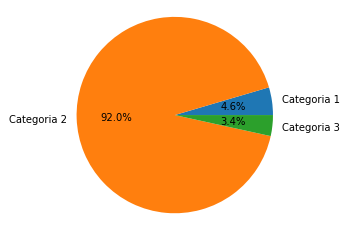

In [11]:
fig1, ax1 = plt.subplots()
ax1.pie(results['Doze administrate'], labels=categories, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Generate stats for Bucharest

In [12]:
df_bucuresti = df_clean.loc[df_clean['Județ'] == 'Bucuresti']

results_buc = df_bucuresti.groupby('Grupa').sum()
results_buc

,Doze administrate,Doza 1,Doza 2
Grupa,,,
1,10277.0,7205.0,3072.0
2,142323.0,114873.0,27450.0
3,3145.0,2437.0,708.0


In [13]:
source = pd.DataFrame({
    'Categorii': categories,
    'Numar vaccinari': results_buc['Doze administrate']
})


alt.Chart(source).mark_bar(size=50).encode(
    x='Categorii',
    y='Numar vaccinari'
).properties(width=alt.Step(100))

alt.Chart(...)